# MAST30034 Peoject 1 2022
Your personal imformation

In [1]:
import requests
import pandas as pd
import numpy as np

## Data preparation

### Download the dataset

In [2]:
all_years = [2021]
all_months = ['09', '10', '11', '12']
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/'
file_name = 'yellow_tripdata_%d-%s.parquet'


In [3]:
for year in all_years:
    for month in all_months:
        yellow_csv = file_name % (year, month)
        response = requests.get( url + yellow_csv, allow_redirects=True)
        open( yellow_csv, 'wb').write(response.content)

### Read the dataset

In [ ]:
# Install package to read parquet files
!pip3 install pyarrow

In [4]:
all_yellow_trip_data = pd.DataFrame()

for year in all_years:
    for month in all_months:
        yellow_csv = pd.read_parquet( file_name % (year, month) )
        all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)

/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/3578637784.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)
/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/3578637784.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)
/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/3578637784.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)
/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/3578637784.py:6: FutureWarning: The frame.append method is deprecated and will be removed from 

In [5]:
all_yellow_trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13114615 entries, 0 to 3214368
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee          

### Pre-process: Data properties

In [19]:
# Missing data
import numpy as np

features_nan = [feature for feature in all_yellow_trip_data.columns if all_yellow_trip_data[feature].isnull().sum() > 1]
for feature in features_nan:
    print(f"{feature}: {np.round(all_yellow_trip_data[feature].isnull().mean(), 4)}% missing values")

passenger_count: 0.0388% missing values
RatecodeID: 0.0388% missing values
store_and_fwd_flag: 0.0388% missing values
congestion_surcharge: 0.0388% missing values
airport_fee: 0.0388% missing values


In [20]:
# Clean the empty data
all_data_nonan = all_yellow_trip_data.dropna()
all_data_nonan.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [21]:
# Look at the unique values for different columns
for column in all_data_nonan.columns:
    series = all_data_nonan[column]
    print('Feature : ', column , ' min : ', series.min(), ' max : ', series.max())

Feature :  VendorID  min :  1  max :  2
Feature :  tpep_pickup_datetime  min :  2003-01-01 00:26:16  max :  2098-09-11 02:23:31
Feature :  tpep_dropoff_datetime  min :  2003-01-01 00:38:46  max :  2098-09-11 02:52:04
Feature :  passenger_count  min :  0.0  max :  9.0
Feature :  trip_distance  min :  0.0  max :  18867.9
Feature :  RatecodeID  min :  1.0  max :  99.0
Feature :  store_and_fwd_flag  min :  N  max :  Y
Feature :  PULocationID  min :  1  max :  265
Feature :  DOLocationID  min :  1  max :  265
Feature :  payment_type  min :  1  max :  5
Feature :  fare_amount  min :  -758.0  max :  818283.44
Feature :  extra  min :  -5.5  max :  30.5
Feature :  mta_tax  min :  -0.55  max :  38.8
Feature :  tip_amount  min :  -190.2  max :  999.99
Feature :  tolls_amount  min :  -88.75  max :  911.3
Feature :  improvement_surcharge  min :  -0.3  max :  0.3
Feature :  total_amount  min :  -951.0  max :  818286.74
Feature :  congestion_surcharge  min :  -2.5  max :  2.75
Feature :  airport_fee 

### Data cleaning

In [22]:
cleaned_data = all_data_nonan[all_data_nonan["passenger_count"] > 0]
cleaned_data  = cleaned_data [cleaned_data["trip_distance"] != 0]
cleaned_data  = cleaned_data [(cleaned_data ['tpep_pickup_datetime']<='2021-12-31 23:59:59') & (cleaned_data ['tpep_pickup_datetime']>='2021-09-01 00:00:00')]
cleaned_data  = cleaned_data [(cleaned_data ['tpep_dropoff_datetime']<='2021-12-31 23:59:59') & (cleaned_data ['tpep_dropoff_datetime']>='2021-09-01 00:00:00')]

cleaned_data = cleaned_data[cleaned_data["payment_type"] == 1]
cleaned_data = cleaned_data[cleaned_data["fare_amount"] >= 2.5]

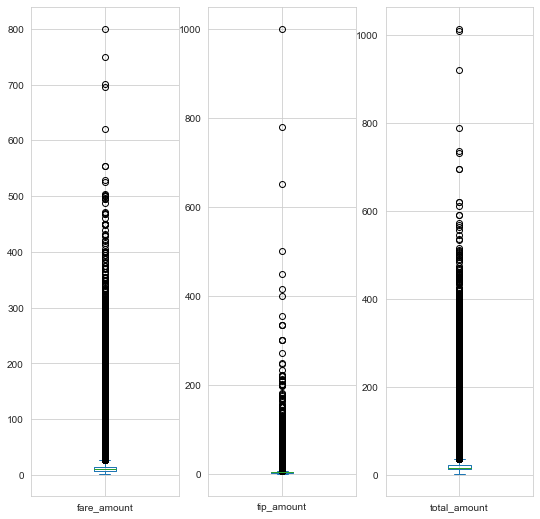

In [23]:
check_feature = ['fare_amount','tip_amount','total_amount']
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9,9))
#fig.suptitle("Outliers of amounts before cleaning", fontsize=30, y=0.95)
plt.subplots_adjust(hspace=0.5)
i = 0
for k in check_feature:
    cleaned_data.plot(y=k, kind='box', ax=axs.ravel()[i])
    i += 1
plt.show()

In [24]:
# Clean the outlier in amount feature
amount = ["fare_amount", "tip_amount", "total_amount"]
Q1 = cleaned_data[amount].quantile(0.25)
Q3 = cleaned_data[amount].quantile(0.75)
IQR = Q3 - Q1
cleaned = cleaned_data[~((cleaned_data[amount] < (Q1-3*IQR)) | (cleaned_data[amount] > (Q3+3*IQR))).any(axis=1)]


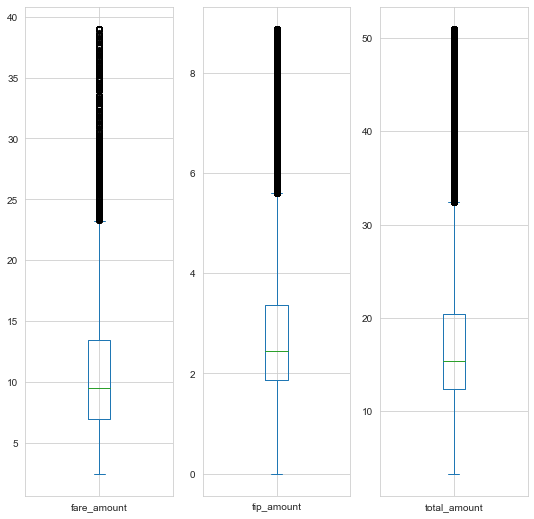

In [25]:
# Plot result
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 9))
#fig.suptitle("Outliers of amounts after cleaning", fontsize=30, y=0.95)
plt.subplots_adjust(hspace=0.5)
i = 0
for k in amount:
    cleaned.plot(y=k, kind='box', ax=axs.ravel()[i])
    i += 1
plt.show()

### Add new attributes

In [26]:
# Process time information into new features

cleaned['month'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.month
cleaned['day'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.day
cleaned['week'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.week
cleaned['weekday'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.weekday
cleaned['starting_hour'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.hour
cleaned['ending_hour'] = pd.to_datetime(cleaned['tpep_dropoff_datetime']).dt.hour
cleaned['trip_time'] = (pd.to_datetime(cleaned['tpep_dropoff_datetime'])-pd.to_datetime(cleaned['tpep_pickup_datetime'])).dt.total_seconds()
cleaned['date'] = cleaned['tpep_pickup_datetime'].apply(str).str[:13]

/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/1527319132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['month'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.month
/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/1527319132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['day'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.day
/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/1527319132.py:5: FutureWarning: Series.dt.w

In [27]:
cleaned.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,month,day,week,weekday,starting_hour,ending_hour,trip_time,date
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,2.5,0.0,9,1,35,2,6,6,654.0,2021-09-01 06
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,...,2.5,0.0,9,1,35,2,6,6,368.0,2021-09-01 06
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,...,2.5,0.0,9,1,35,2,6,6,255.0,2021-09-01 06
5,1,2021-09-01 00:15:08,2021-09-01 00:21:39,1.0,1.60,1.0,N,239,263,1,...,2.5,0.0,9,1,35,2,0,0,391.0,2021-09-01 00
6,1,2021-09-01 00:35:36,2021-09-01 00:57:56,1.0,7.60,1.0,N,137,42,1,...,2.5,0.0,9,1,35,2,0,0,1340.0,2021-09-01 00
7,2,2021-09-01 00:34:09,2021-09-01 00:42:25,1.0,1.24,1.0,N,45,232,1,...,2.5,0.0,9,1,35,2,0,0,496.0,2021-09-01 00
10,2,2021-09-01 00:56:22,2021-09-01 01:21:37,1.0,6.14,1.0,N,181,149,1,...,0.0,0.0,9,1,35,2,0,1,1515.0,2021-09-01 00
11,2,2021-09-01 00:05:12,2021-09-01 00:11:44,1.0,0.92,1.0,N,234,107,1,...,2.5,0.0,9,1,35,2,0,0,392.0,2021-09-01 00
12,2,2021-09-01 00:15:13,2021-09-01 00:18:50,1.0,1.38,1.0,N,137,229,1,...,2.5,0.0,9,1,35,2,0,0,217.0,2021-09-01 00
13,2,2021-09-01 00:22:00,2021-09-01 00:28:02,1.0,1.36,1.0,N,233,140,1,...,2.5,0.0,9,1,35,2,0,0,362.0,2021-09-01 00


### Get additional data -- weather

In [12]:
# Load weather data
weather_data = pd.read_csv("weather_hourly.csv")
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2929 non-null   object 
 1   datetime          2929 non-null   object 
 2   temp              2929 non-null   float64
 3   feelslike         2929 non-null   float64
 4   dew               2929 non-null   float64
 5   humidity          2929 non-null   float64
 6   precip            2929 non-null   float64
 7   precipprob        2929 non-null   int64  
 8   preciptype        228 non-null    object 
 9   snow              2929 non-null   float64
 10  snowdepth         2929 non-null   float64
 11  windgust          777 non-null    float64
 12  windspeed         2929 non-null   float64
 13  winddir           2929 non-null   float64
 14  sealevelpressure  2929 non-null   float64
 15  cloudcover        2929 non-null   float64
 16  visibility        2929 non-null   float64


In [29]:
# Pick features
weather_data_pick = weather_data[['datetime','feelslike','humidity','windspeed','visibility','solarradiation','conditions']]
weather_data_pick['datetime'] = weather_data_pick['datetime'].str[:13]
weather_data_pick['datetime'] = weather_data_pick['datetime'].str.replace('T',' ')

weather_data_pick = weather_data_pick.join(pd.get_dummies(weather_data_pick.conditions,prefix='conditions'))
#weather_data_pick = weather_data_pick.drop('conditions',axis=1)
weather_data_pick.head(10)

/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/1863502654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_pick['datetime'] = weather_data_pick['datetime'].str[:13]
/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/1863502654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_pick['datetime'] = weather_data_pick['datetime'].str.replace('T',' ')


,datetime,feelslike,humidity,windspeed,visibility,solarradiation,conditions,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,2021-09-01 00,25.7,58.77,5.0,16.0,0.0,Partially cloudy,0,0,1,0,0,0,0
1,2021-09-01 01,26.1,57.37,5.4,16.0,0.0,Overcast,0,1,0,0,0,0,0
2,2021-09-01 02,25.4,61.37,0.0,16.0,0.0,Overcast,0,1,0,0,0,0,0
3,2021-09-01 03,25.0,62.75,0.9,16.0,0.0,Overcast,0,1,0,0,0,0,0
4,2021-09-01 04,24.6,67.29,1.8,16.0,0.0,Overcast,0,1,0,0,0,0,0
5,2021-09-01 05,23.8,72.79,4.7,16.0,0.0,Overcast,0,1,0,0,0,0,0
6,2021-09-01 06,23.3,75.48,6.9,16.0,3.2,Overcast,0,1,0,0,0,0,0
7,2021-09-01 07,21.7,82.01,5.1,13.5,8.0,"Rain, Overcast",0,0,0,1,0,0,0
8,2021-09-01 08,21.5,87.18,10.0,7.8,17.0,"Rain, Overcast",0,0,0,1,0,0,0
9,2021-09-01 09,21.5,91.52,9.0,8.9,55.0,"Rain, Overcast",0,0,0,1,0,0,0


In [14]:
for column in weather_data_pick.columns:
    series =  weather_data_pick[column]
    print('Feature : ', column , ' min : ', series.min(), ' max : ', series.max())

Feature :  datetime  min :  2021-09-01 00  max :  2021-12-31 23
Feature :  feelslike  min :  -8.7  max :  32.3
Feature :  humidity  min :  14.45  max :  95.56
Feature :  windspeed  min :  0.0  max :  41.6
Feature :  visibility  min :  0.7  max :  16.0
Feature :  solarradiation  min :  0.0  max :  941.0
Feature :  conditions_Clear  min :  0  max :  1
Feature :  conditions_Overcast  min :  0  max :  1
Feature :  conditions_Partially cloudy  min :  0  max :  1
Feature :  conditions_Rain, Overcast  min :  0  max :  1
Feature :  conditions_Rain, Partially cloudy  min :  0  max :  1
Feature :  conditions_Snow, Rain, Overcast  min :  0  max :  1
Feature :  conditions_Snow, Rain, Partially cloudy  min :  0  max :  1


In [30]:
# Merge to get new data
data = pd.merge(cleaned, weather_data_pick, left_on='date', right_on='datetime')

In [31]:
data = data.drop(['datetime','date'],axis=1)
data.head(50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,visibility,solarradiation,conditions,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
3,1,2021-09-01 06:02:50,2021-09-01 06:09:01,1.0,0.90,1.0,N,100,161,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
4,1,2021-09-01 06:23:23,2021-09-01 06:27:48,1.0,1.00,1.0,N,48,68,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
5,1,2021-09-01 06:29:16,2021-09-01 06:32:55,1.0,0.90,1.0,N,186,48,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
6,1,2021-09-01 06:36:20,2021-09-01 06:40:38,1.0,1.00,1.0,N,50,48,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
7,1,2021-09-01 06:48:40,2021-09-01 06:52:07,1.0,0.90,1.0,N,143,238,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
8,2,2021-09-01 06:46:09,2021-09-01 06:54:03,1.0,1.94,1.0,N,234,229,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0
9,2,2021-09-01 06:59:11,2021-09-01 07:06:25,1.0,1.23,1.0,N,237,161,1,...,16.0,3.2,Overcast,0,1,0,0,0,0,0


In [31]:
data.to_csv('processed.csv') # Save processe data to save time

## Data analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('processed.csv')

### Heat map analysis

<AxesSubplot:>

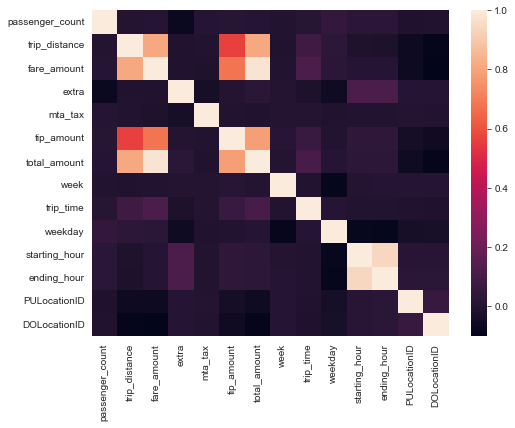

In [8]:
CORR_COLS = ["passenger_count", "trip_distance", "fare_amount", "extra",
             "mta_tax", "tip_amount", "total_amount", "week", "trip_time", "weekday", "starting_hour","ending_hour","PULocationID","DOLocationID"]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.heatmap(data[CORR_COLS].corr(),ax=axs)

In [28]:
# plot the Counts to Whether the Passenger Give Tips
cleaned[cleaned_data['tip_amount']==0].count()

/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/1962607566.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned[cleaned_data['tip_amount']==0].count()
/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_58992/1962607566.py:2: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  cleaned[cleaned_data['tip_amount']==0].count()


ValueError: cannot reindex on an axis with duplicate labels

<AxesSubplot:>

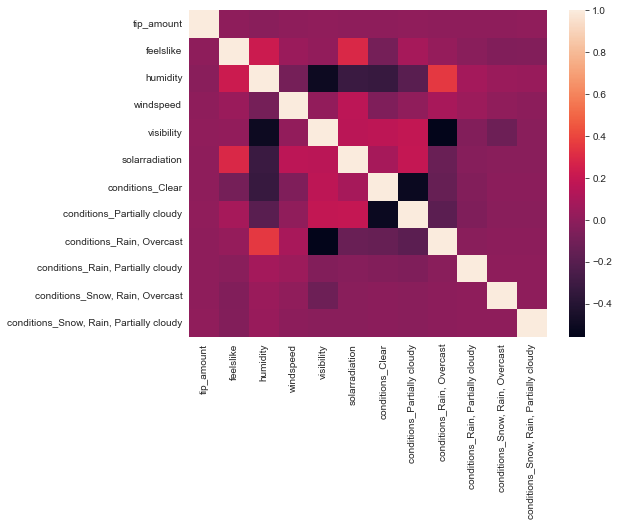

In [11]:
WEATHER_COL = ["tip_amount","feelslike","humidity","windspeed","visibility","solarradiation","conditions_Clear","conditions_Partially cloudy","conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.heatmap(data[WEATHER_COL].corr(),ax=axs)

### Data distribution analysis

/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

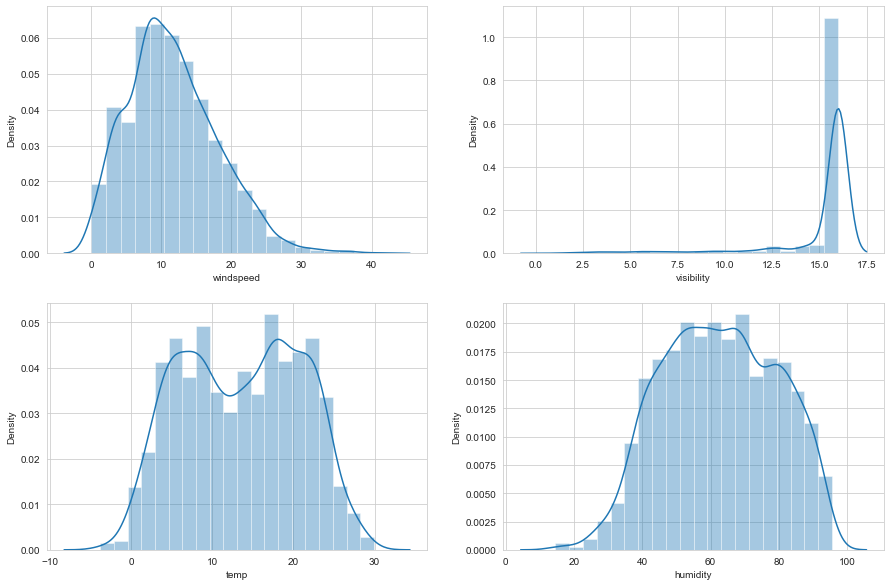

In [17]:
weather_feature = ['windspeed','visibility','temp','humidity']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
axs = [ax1, ax2, ax3, ax4]
for feature, ax in zip(weather_feature, axs):
    sns.distplot(weather_data[feature], ax=ax, bins=20)
#plt.suptitle('Weather Feature Distribution',fontsize=30,y=0.95)
plt.show()


/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seab

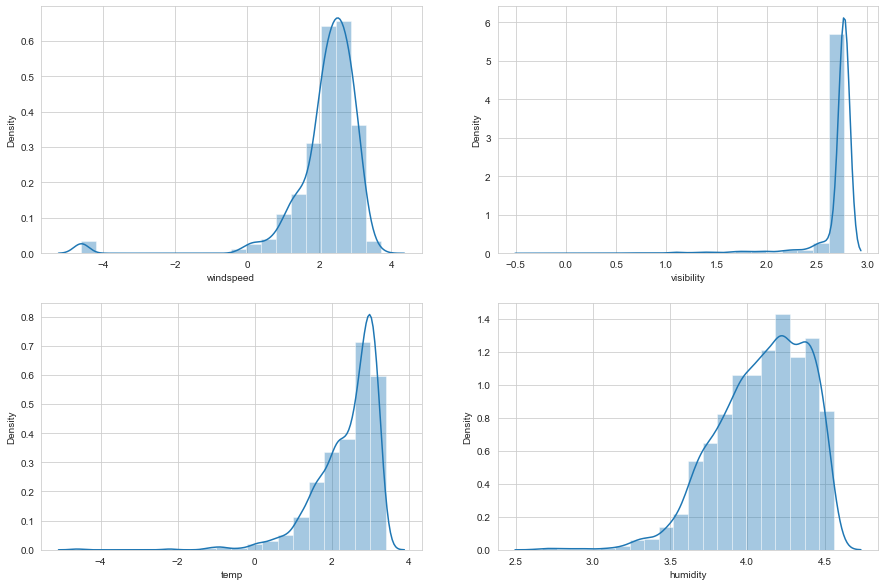

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
axs = [ax1, ax2, ax3, ax4]
for feature, ax in zip(weather_feature, axs):
    data_log = np.log(weather_data[feature]+0.01)
    sns.distplot(data_log, ax=ax, bins=20)
#plt.suptitle('Weather Feature Log Distribution',fontsize=30,y=0.95)
plt.show()

In [ ]:
taxi_feature = ['fare_amount','tip_amount']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,2))
axs = [ax1, ax2, ax3, ax4]
for feature, ax in zip(taxi_feature, axs):
    sns.distplot(cleaned[feature], ax=ax, bins=20)
#plt.suptitle('Taxi Fare Distribution',fontsize=30,y=0.95)
plt.show()

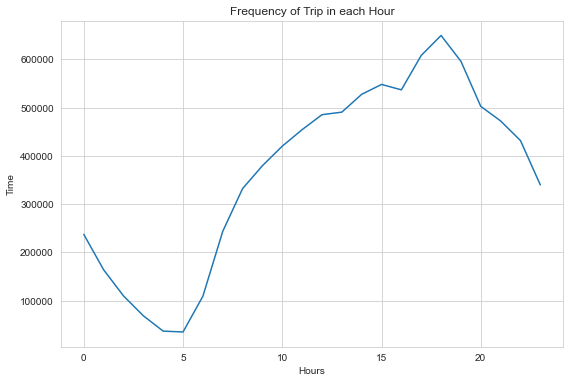

In [151]:
# trip freq by hour
plt.figure(figsize=(9, 6))
count = data.groupby("starting_hour").count()["tpep_pickup_datetime"]
plt.plot(count.index, count)
plt.ylabel("Time")
plt.xlabel("Hours")
plt.title('Frequency of Trip in each Hour')
plt.savefig('Frequency of Trip in each Hour.png')
plt.show()

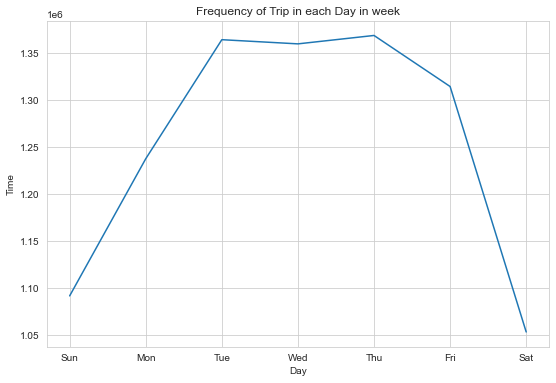

In [36]:
# trip freq by week day
plt.figure(figsize=(9, 6))
count = data.groupby("weekday").count()["tpep_pickup_datetime"]
index = ['Sun', 'Mon', 'Tue', 'Wed','Thu','Fri','Sat']
plt.plot(index, count)
plt.ylabel("Time")
plt.xlabel("Day")
plt.title('Frequency of Trip in each Day in week')
plt.savefig('Frequency of Trip in each Day in week.png')
plt.show()

/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conditions', ylabel='tpep_pickup_datetime'>

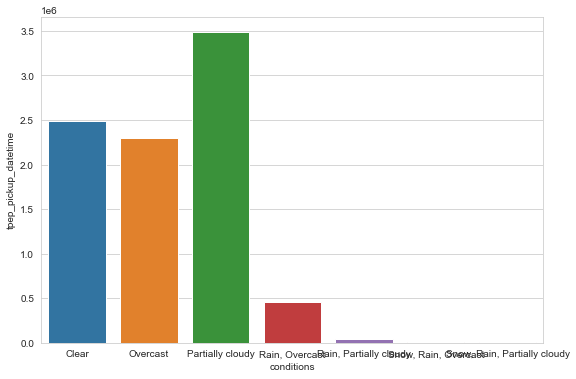

In [50]:
# average trip by weather
plt.figure(figsize=(9, 6))
ave_trip = data.groupby("conditions").count()["tpep_pickup_datetime"]
#plt.title('Average tip by weather conditions')
sns.barplot(ave_trip.index, ave_trip)

/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Overcast'),
  Text(2, 0, 'Partially cloudy'),
  Text(3, 0, 'Rain, Overcast'),
  Text(4, 0, 'Rain, Partially cloudy'),
  Text(5, 0, 'Snow, Rain, Overcast'),
  Text(6, 0, 'Snow, Rain, Partially cloudy')])

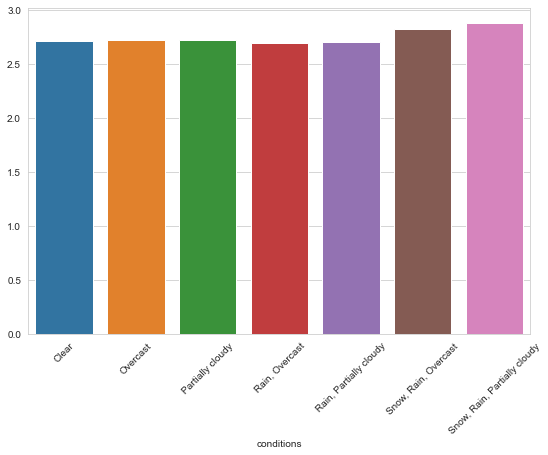

In [51]:
# average tip by weather
plt.figure(figsize=(9, 6))
ave_tip = data.groupby("conditions").sum()['tip_amount']/data.groupby("conditions").count()["tpep_pickup_datetime"]
#plt.title('Average tip by weather conditions')
sns.barplot(ave_tip.index, ave_tip)
plt.xticks(rotation=45)

/Users/luohaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Average tip by hour'}, xlabel='starting_hour'>

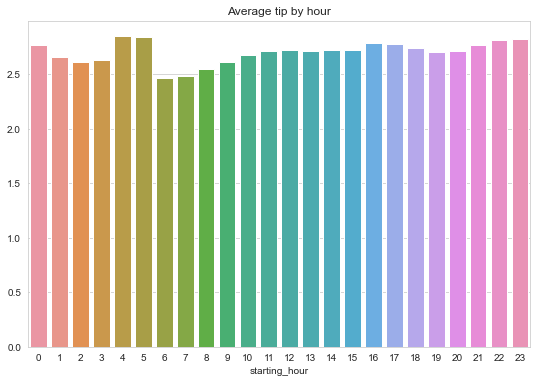

In [170]:
# average tip by hour
plt.figure(figsize=(9, 6))
ave_tip = data.groupby("starting_hour").sum()['tip_amount']/data.groupby("starting_hour").count()["tpep_pickup_datetime"]
plt.title('Average tip by hour')
sns.barplot(ave_tip.index, ave_tip)

### Location analysis

In [34]:
!pip3 install geopandas

     |████████████████████████████████| 1.0 MB 480 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 479 kB/s eta 0:00:01
     |████████████████████████████████| 8.2 MB 436 kB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 441 kB/s eta 0:00:01


In [36]:
import geopandas as gpd

# sf stands for shape file
sf = gpd.read_file("taxi_zones.shp")
zone = pd.read_csv("taxi+_zone_lookup.csv")

# Convert the geometry shaape to to latitude and longitude
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

In [37]:
DO_count = data['DOLocationID'].value_counts().sort_index()
DO_count = pd.DataFrame({"LocationID":DO_count.index, "DO_Count":DO_count})
gdf = gpd.GeoDataFrame(pd.merge(DO_count, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID', axis=1)
gdf.sort_values("DO_Count",ascending=False)

,DO_Count,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
230,582840,236,0.044252,0.000103,Upper East Side North,Manhattan,"POLYGON ((-73.95779 40.77360, -73.95826 40.772..."
231,558835,237,0.042213,0.000096,Upper East Side South,Manhattan,"POLYGON ((-73.96613 40.76218, -73.96658 40.761..."
156,447227,161,0.035804,0.000072,Midtown Center,Manhattan,"POLYGON ((-73.97534 40.75530, -73.97581 40.754..."
165,373285,170,0.045769,0.000074,Murray Hill,Manhattan,"POLYGON ((-73.97203 40.74580, -73.97213 40.745..."
137,362326,142,0.038176,0.000076,Lincoln Square East,Manhattan,"POLYGON ((-73.98148 40.76773, -73.98155 40.767..."
...,...,...,...,...,...,...,...
83,62,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,Staten Island,"POLYGON ((-74.16006 40.52764, -74.15988 40.527..."
4,53,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
198,37,204,0.101912,0.000641,Rossville/Woodrow,Staten Island,"POLYGON ((-74.20326 40.55563, -74.20291 40.554..."
1,8,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."


/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_61987/3721858982.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sn)


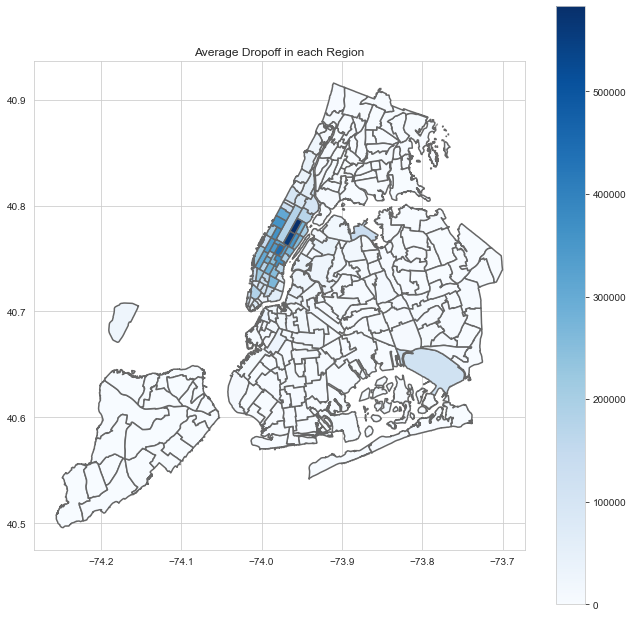

In [38]:
# plot the map showing drop off locations
variable = 'DO_Count'
vmin, vmax = 0, gdf['DO_Count'].max()
fig, ax = plt.subplots(1, figsize=(11,11))
ax.set_title('Average Dropoff in each Region')
sn = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sn.set_array([])
fig.colorbar(sn)
gdf.plot(column=variable, cmap='Blues', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig('Average Dropoff in each Region.png')
plt.show()

In [156]:
fare_region = data.groupby('PULocationID')['fare_amount'].sum()/data['PULocationID'].value_counts().sort_index()
fare_region = pd.DataFrame({"LocationID":fare_region.index, "fare_region":fare_region})
gdf = gpd.GeoDataFrame(pd.merge(fare_region, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID', axis=1)
top_10 = gdf.sort_values("fare_region",ascending=False)[:10]
top_10

,fare_region,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
106,38.000000,118,0.243966,0.001827,Heartland Village/Todt Hill,Staten Island,"POLYGON ((-74.10834 40.61023, -74.10779 40.610..."
173,35.000000,187,0.126868,0.000421,Port Richmond,Staten Island,"MULTIPOLYGON (((-74.13435 40.64189, -74.13430 ..."
54,32.600000,59,0.037795,0.000063,Crotona Park,Bronx,"POLYGON ((-73.88942 40.83942, -73.88869 40.839..."
170,32.000000,184,0.260816,0.001989,Pelham Bay Park,Bronx,"MULTIPOLYGON (((-73.80729 40.88593, -73.80693 ..."
59,31.443529,64,0.184452,0.001058,Douglaston,Queens,"POLYGON ((-73.74412 40.77864, -73.74154 40.777..."
169,31.381250,183,0.039826,0.000095,Pelham Bay,Bronx,"POLYGON ((-73.83677 40.84339, -73.83689 40.843..."
90,31.166000,96,0.185180,0.000548,Forest Park/Highland Park,Queens,"POLYGON ((-73.83804 40.70832, -73.83773 40.708..."
39,30.000000,44,0.235689,0.001945,Charleston/Tottenville,Staten Island,"POLYGON ((-74.21220 40.55644, -74.21350 40.555..."
187,29.800000,201,0.130404,0.000619,Rockaway Park,Queens,"POLYGON ((-73.81850 40.58736, -73.81830 40.587..."
105,29.654167,117,0.169886,0.000904,Hammels/Arverne,Queens,"POLYGON ((-73.77636 40.60966, -73.77627 40.609..."


/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_61987/4121274499.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sn)


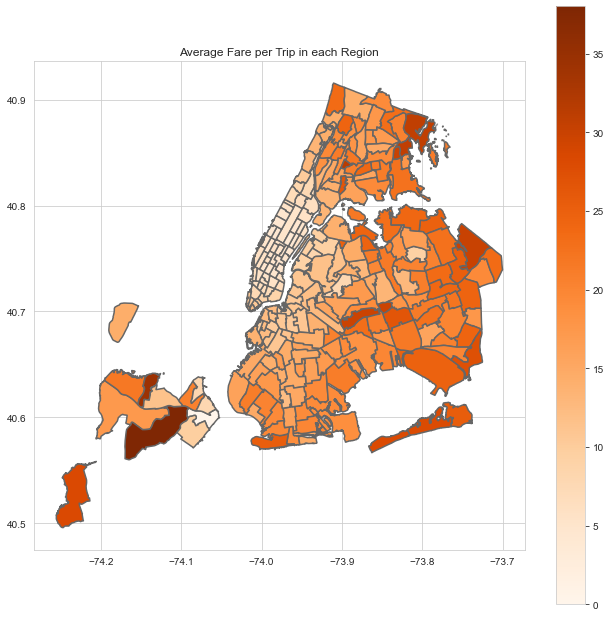

In [160]:
# plot the map showing ave tip in each region
variable = 'fare_region'
vmin, vmax = 0, gdf['fare_region'].max()
fig, ax = plt.subplots(1, figsize=(11,11))
ax.set_title('Average Fare per Trip in each Region')
sn = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sn.set_array([])
fig.colorbar(sn)
gdf.plot(column=variable, cmap='Oranges', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig('Average Fare per Trip in each Region.png')
plt.show()

In [40]:
tip_region = data.groupby('PULocationID')['tip_amount'].sum()/data['PULocationID'].value_counts().sort_index()
tip_region = pd.DataFrame({"LocationID":tip_region.index, "tip_region":tip_region})
gdf = gpd.GeoDataFrame(pd.merge(tip_region, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID', axis=1)
top_10 = gdf.sort_values("tip_region",ascending=False)[:10]
top_10

,tip_region,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
246,15.853846,251,0.137711,0.000626,Westerleigh,Staten Island,"POLYGON ((-74.13107 40.63115, -74.13059 40.630..."
0,11.654997,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,11.355000,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
7,11.140000,8,0.027591,0.000027,Astoria Park,Queens,"POLYGON ((-73.92334 40.77513, -73.92398 40.774..."
199,9.613636,204,0.101912,0.000641,Rossville/Woodrow,Staten Island,"POLYGON ((-74.20326 40.55563, -74.20291 40.554..."
209,9.147500,214,0.135300,0.000812,South Beach/Dongan Hills,Staten Island,"POLYGON ((-74.08491 40.59570, -74.08407 40.595..."
240,8.596000,245,0.095983,0.000466,West Brighton,Staten Island,"POLYGON ((-74.09788 40.64036, -74.09767 40.638..."
92,7.319707,93,0.170998,0.000594,Flushing Meadows-Corona Park,Queens,"POLYGON ((-73.85696 40.76407, -73.85667 40.763..."
9,7.274367,10,0.099839,0.000436,Baisley Park,Queens,"POLYGON ((-73.78327 40.68999, -73.78234 40.688..."
57,7.095833,58,0.059855,0.000205,Country Club,Bronx,"POLYGON ((-73.81561 40.84819, -73.81569 40.848..."


/var/folders/p1/lbf3fh3d3ps40785lcvcc85m0000gn/T/ipykernel_61987/3099350790.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sn)


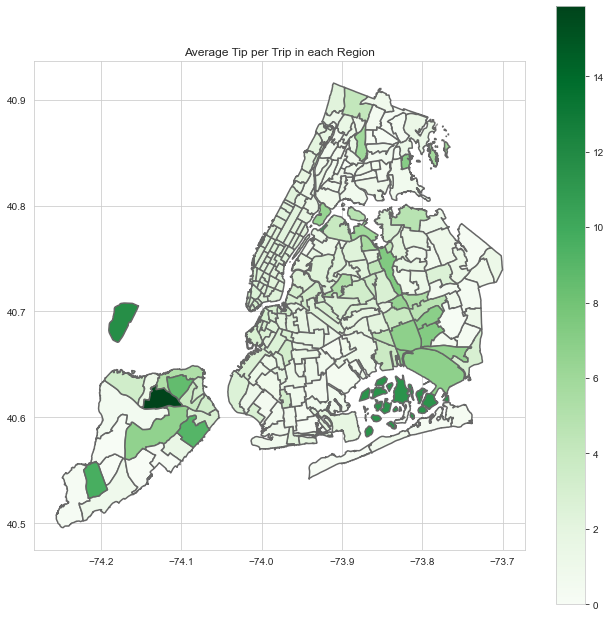

In [41]:
# plot the map showing ave tip in each region
variable = 'tip_region'
vmin, vmax = 0, gdf['tip_region'].max()
fig, ax = plt.subplots(1, figsize=(11,11))
ax.set_title('Average Tip per Trip in each Region')
sn = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sn.set_array([])
fig.colorbar(sn)
gdf.plot(column=variable, cmap='Greens', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig('Average Tip per Trip in each Region.png')
plt.show()

### Analysis with weather

In [171]:
weather_data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"New York City,USA",2021-09-01,26.1,18.4,22.3,26.1,18.4,22.3,18.3,79.1,...,3.1,2,NaN,2021-09-01T06:23:15,2021-09-01T19:27:54,0.86,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"72505394728,KEWR,KLGA,72502014734,E5816,F8726,..."
1,"New York City,USA",2021-09-02,24.9,16.9,20.4,24.9,16.9,20.4,12.0,61.2,...,22.6,9,NaN,2021-09-02T06:24:13,2021-09-02T19:26:17,0.90,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"72505394728,KEWR,KLGA,72502014734,KNYC,F1417,7..."
2,"New York City,USA",2021-09-03,23.0,15.5,19.7,23.0,15.5,19.7,11.2,58.3,...,18.6,9,NaN,2021-09-03T06:25:12,2021-09-03T19:24:40,0.94,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,KNYC,F1417,7..."
3,"New York City,USA",2021-09-04,25.8,17.2,21.3,25.8,17.2,21.3,12.8,59.6,...,22.2,9,NaN,2021-09-04T06:26:10,2021-09-04T19:23:02,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72505394728,KEWR,KLGA,72502014734,KNYC,F1417,7..."
4,"New York City,USA",2021-09-05,23.7,19.5,21.9,23.7,19.5,21.9,17.1,74.1,...,4.9,3,NaN,2021-09-05T06:27:09,2021-09-05T19:21:23,0.99,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"72505394728,KEWR,KLGA,72502014734,F8726,KNYC,F..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,"New York City,USA",2021-12-27,4.7,1.4,2.7,3.3,-2.8,0.4,-4.5,59.6,...,2.0,2,NaN,2021-12-27T07:19:13,2021-12-27T16:35:30,0.78,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"72505394728,KEWR,KLGA,72502014734,E5816,F8726,..."
118,"New York City,USA",2021-12-28,8.2,2.5,5.9,8.0,1.0,4.3,0.8,71.6,...,3.3,2,NaN,2021-12-28T07:19:29,2021-12-28T16:36:13,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"72505394728,KEWR,KLGA,72502014734,E5816,F8726,..."
119,"New York City,USA",2021-12-29,6.8,5.3,5.9,6.3,1.8,3.8,3.9,87.0,...,1.5,1,NaN,2021-12-29T07:19:43,2021-12-29T16:36:57,0.88,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72505394728,KEWR,KLGA,72502014734,E5816,KNYC,F..."
120,"New York City,USA",2021-12-30,9.3,6.4,7.8,8.8,4.8,7.0,5.8,87.1,...,2.6,2,NaN,2021-12-30T07:19:55,2021-12-30T16:37:44,0.93,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"72505394728,KEWR,KLGA,72502014734,E5816,KNYC,F..."


## Model design

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt

In [53]:
target = data['tip_amount']

In [58]:
features = data.drop(['tip_amount','total_amount','tpep_pickup_datetime','tpep_dropoff_datetime','VendorID','RatecodeID','store_and_fwd_flag','payment_type','conditions'],axis=1)

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,random_state=0,test_size=0.3)

In [60]:
X_train

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,...,windspeed,visibility,solarradiation,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy"
5068577,1.0,1.58,90,231,9.0,0.0,0.5,0.0,0.3,2.5,...,18.5,16.0,537.0,1,0,0,0,0,0,0
8483767,1.0,4.00,263,186,13.5,2.5,0.5,0.0,0.3,2.5,...,9.8,14.8,11.0,0,1,0,0,0,0,0
8205035,1.0,1.96,90,161,8.5,0.5,0.5,0.0,0.3,2.5,...,5.0,1.9,0.0,0,1,0,0,0,0,0
8451939,1.0,1.40,107,186,9.0,0.0,0.5,0.0,0.3,2.5,...,20.2,16.0,187.0,0,0,1,0,0,0,0
8140812,1.0,2.28,246,211,10.0,0.0,0.5,0.0,0.3,2.5,...,3.3,16.0,38.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222403,1.0,1.18,148,107,7.5,0.0,0.5,0.0,0.3,2.5,...,14.6,16.0,60.0,0,0,1,0,0,0,0
5157699,1.0,1.53,43,151,8.0,0.0,0.5,0.0,0.3,0.0,...,11.4,16.0,361.0,0,0,1,0,0,0,0
2215104,1.0,1.20,237,236,9.0,2.5,0.5,0.0,0.3,2.5,...,20.0,12.1,96.0,0,1,0,0,0,0,0
1484405,1.0,1.74,141,142,8.5,0.5,0.5,0.0,0.3,2.5,...,8.6,9.0,0.0,0,0,0,1,0,0,0


In [61]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
print('Score on train set for LR:',regressor.score(X_train,y_train))
print('Score on test set for LR:',regressor.score(X_test,y_test))

Score on train set for LR: 0.47358808779574924
Score on test set for LR: 0.473573936472119


In [80]:
y_pred = regressor.predict(X_test)

In [65]:
print("Predict tip sum: {}, Real tip sum: {}".format(round(sum(y_pred),2),round(sum((y_test),2))))

Predict tip sum: 7166491.5, Real tip sum: 7167450


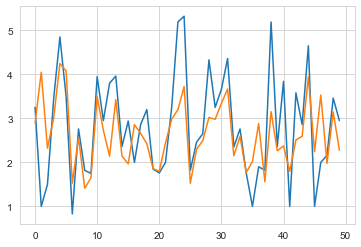

In [81]:
list = [x for x in range(0,50)]
plt.plot(list,y_test[400:450],y_pred[400:450])

In [68]:
from sklearn.metrics import mean_squared_error
mse_loss = mean_squared_error(y_test , y_pred)

print('Mean_sqaure error loss  =  ' , mse_loss)

Mean_sqaure error loss  =   1.177053041854557


In [69]:
from xgboost import XGBRegressor
import sklearn

xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(X_train, y_train)
predicted_XGBoost = xg_model.predict(X_test)
print("Mean Absolute Error using XGBoost: ", sklearn.metrics.mean_squared_error(y_test, predicted_XGBoost))

Mean Absolute Error using XGBoost:  1.104379625705638


In [70]:
print('Score on train set for XGBoost:',xg_model.score(X_train,y_train))
print('Score on test set for XGBoost:',xg_model.score(X_test,y_test))

Score on train set for XGBoost: 0.5107505552295994
Score on test set for XGBoost: 0.5060764482757683


In [76]:
y_pred = xg_model.predict(X_test)

In [77]:
print("Predict tip sum: {}, Real tip sum: {}".format(round(sum(y_pred),2),round(sum((y_test),2))))

Predict tip sum: 7166592.11, Real tip sum: 7167450


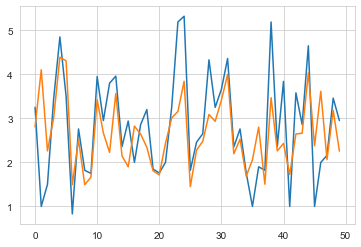

In [79]:
list = [x for x in range(0,50)]
plt.plot(list,y_test[400:450],y_pred[400:450])